--- 

### DSGA1007

--- 

### HW06 

### Due Date: Monday 2020-11-23, 10AM


#### Student Name: Yuhan Liu

#### Student NetID: yl7576

**Problem 1 (100 points)** 

In this problem we examine, by using `pandas`, the provided data in the form of time-series: "Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh)". 
    
    
The columns of the data set are:

```Date — The date (yyyy-mm-dd format)
Consumption — Electricity consumption in GWh
Wind — Wind power production in GWh
Solar — Solar power production in GWh
Wind+Solar — Sum of wind and solar power production in GWh ```   

In [1]:
import pandas as pd
import numpy as np

**1.1 (10 points)** Import the data set by using `pandas` from the given csv file.

As in the lecture, set `index_col=Date` and `parse_dates=True`, so to set indexes as `Date`.

Call this data set `data`.

In [2]:
data = pd.read_csv('opsd_daily.csv', index_col='Date', parse_dates=True)

**1.2 (5 points)** Display first 10 rows of the data frame

In [3]:
data.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


**1.3 (5 points)** Display last 10 rows of the data frame

In [6]:
data.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


**1.4 (5 points)** Use `describe` to describe data.

In [7]:
data.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


**1.5 (5 points)** Create a new data frame by dropping all `na` values.

In [36]:
data_clean = data.dropna()

**1.6 (5 points)** Use `describe` to describe `data_dropna`:

In [9]:
data_clean.describe()

,Consumption,Wind,Solar,Wind+Solar
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1347.519037,183.431878,89.231604,272.663481
std,166.551363,153.390542,58.549772,146.319884
min,899.827000,6.511000,1.968000,21.478000
25%,1222.042000,72.367000,35.161500,172.185500
50%,1380.220000,136.842000,86.390000,240.991000
75%,1460.072500,245.027500,135.038000,338.988000
max,1682.002000,826.278000,241.580000,851.556000


**1.7 (5 points)** Get all the keys of `data`, which we will here also call column names or features:
    

In [10]:
data.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

**1.8 (10 points)** For every of the features, plot its values over time

Text(0.5, 1.0, 'Wind+Solar over time')

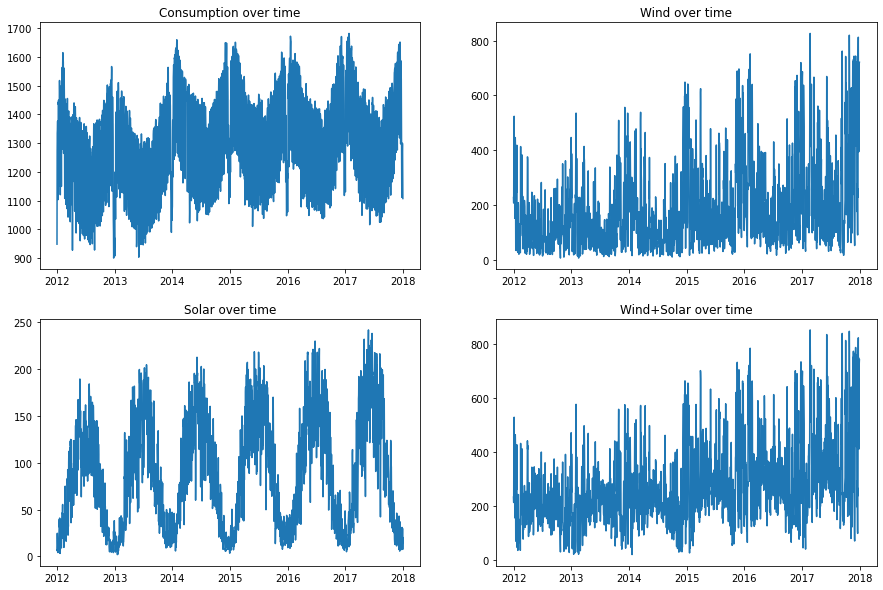

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize = (15,10))

axs[0,0].plot(data_clean.Consumption)
axs[0,0].set_title('Consumption over time')

axs[0,1].plot(data_clean.Wind)
axs[0,1].set_title('Wind over time')

axs[1,0].plot(data_clean.Solar)
axs[1,0].set_title('Solar over time')

axs[1,1].plot(data_clean['Wind+Solar'])
axs[1,1].set_title('Wind+Solar over time')

**1.9 (10 points)** Group-by and average the input data over years. Plot and describe such a data frame. Call that data frame `data_y`.

In [39]:
import datetime
data_y = data_clean.copy()
data_y['year'] = pd.DatetimeIndex(data_y.index).year
data_y = data_y.groupby('year').mean()
data_y

,Consumption,Wind,Solar,Wind+Solar
year,,,,
2012,1282.991131,125.307833,76.194896,201.502730
2013,1270.636543,129.855821,81.431901,211.287722
2014,1381.989028,140.941166,89.364088,230.305254
2015,1384.286474,212.243819,95.635995,307.879814
2016,1382.315175,210.404716,94.433945,304.838661
2017,1382.839368,281.280452,98.308611,379.589063


In [40]:
data_y.describe()

,Consumption,Wind,Solar,Wind+Solar
count,6.000000,6.000000,6.000000,6.000000
mean,1347.509620,183.338968,89.228239,272.567207
std,54.905537,61.945480,8.732482,69.761755
min,1270.636543,125.307833,76.194896,201.502730
25%,1307.740605,132.627157,83.414948,216.042105
50%,1382.152101,175.672941,91.899017,267.571958
75%,1382.708320,211.784043,95.335482,307.119526
max,1384.286474,281.280452,98.308611,379.589063


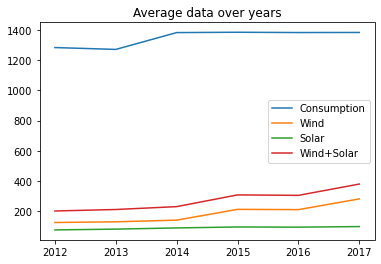

In [41]:
plt.plot(data_y['Consumption'], label = 'Consumption')
plt.plot(data_y['Wind'], label = 'Wind')
plt.plot(data_y['Solar'], label = 'Solar')
plt.plot(data_y['Wind+Solar'], label = 'Wind+Solar')
plt.legend()
plt.title('Average data over years')
plt.show()

**1.10 (10 points)** Group-by and average the input data over months. Plot and describe such a data frame. Call that data frame `data_m`.

In [42]:
data_m = data_clean.copy()
data_m['month'] = pd.DatetimeIndex(data_m.index).month
data_m = data_m.groupby('month').mean()
data_m

,Consumption,Wind,Solar,Wind+Solar
month,,,,
1,1437.985962,240.605699,19.569602,260.175301
2,1463.736812,228.107529,43.846735,271.954265
3,1386.800000,196.115000,87.704039,283.819039
4,1321.468717,162.626022,119.734933,282.360956
5,1278.043817,142.529984,139.967312,282.497296
6,1278.322833,129.701367,152.569494,282.270861
7,1284.395505,122.128403,150.746720,272.875124
8,1262.279568,118.097667,138.778575,256.876242
9,1316.374233,138.448878,103.247256,241.696133


In [43]:
data_m.describe()

,Consumption,Wind,Solar,Wind+Solar
count,12.000000,12.000000,12.000000,12.000000
mean,1348.313535,183.579428,89.035891,272.615320
std,69.206858,58.781925,52.079012,22.464881
min,1262.279568,118.097667,19.569602,241.696133
25%,1282.877337,136.262000,40.602332,258.472610
50%,1336.015277,175.543073,95.475647,272.414694
75%,1396.803904,228.114550,139.075759,282.395041
max,1463.736812,307.996855,152.569494,328.065392


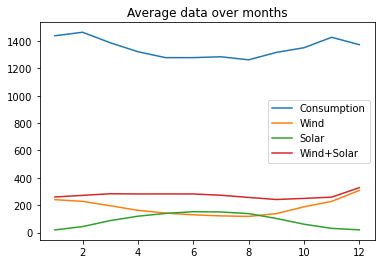

In [44]:
plt.plot(data_m['Consumption'], label = 'Consumption')
plt.plot(data_m['Wind'], label = 'Wind')
plt.plot(data_m['Solar'], label = 'Solar')
plt.plot(data_m['Wind+Solar'], label = 'Wind+Solar')
plt.legend()
plt.title('Average data over months')
plt.show()

**1.11 (10 points)** Group-by and average the input data over days. Plot and describe such a data frame. Call that data frame `data_d`.

In [45]:
data_d = data_clean.copy()
data_d['day'] = pd.DatetimeIndex(data_d.index).day
data_d = data_d.groupby('day').mean()
data_d

,Consumption,Wind,Solar,Wind+Solar
day,,,,
1,1282.259915,179.253764,88.110639,267.364403
2,1335.586326,192.585167,89.258931,281.844097
3,1331.201690,180.589014,89.773583,270.362597
4,1355.626323,184.985097,90.374042,275.359139
5,1347.932921,170.594444,88.851000,259.445444
6,1352.996974,183.609694,93.027653,276.637347
7,1362.176815,193.960653,91.949694,285.910347
8,1356.335522,192.286694,90.853653,283.140347
9,1352.760204,199.153931,88.183028,287.336958


In [46]:
data_d.describe()

,Consumption,Wind,Solar,Wind+Solar
count,31.000000,31.000000,31.000000,31.000000
mean,1346.717188,183.842843,89.210268,273.053110
std,20.632099,13.256602,1.993499,13.127479
min,1282.259915,159.486014,84.085746,250.086389
25%,1336.894104,173.458792,87.887535,262.274660
50%,1352.996974,183.609694,89.258931,275.359139
75%,1358.350440,192.616271,90.487208,282.925420
max,1372.314388,211.500507,93.027653,298.629125


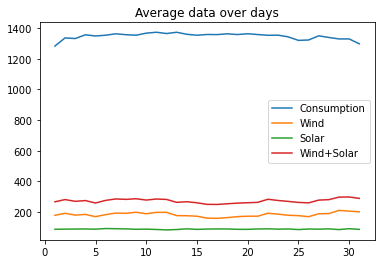

In [47]:
plt.plot(data_d['Consumption'], label = 'Consumption')
plt.plot(data_d['Wind'], label = 'Wind')
plt.plot(data_d['Solar'], label = 'Solar')
plt.plot(data_d['Wind+Solar'], label = 'Wind+Solar')
plt.legend()
plt.title('Average data over days')
plt.show()

**1.12 (15 points)** For each of the above frames `data_y`, `data_m`, `data_d`, consider their features `['Consumption', 'Wind', 'Solar', 'Wind+Solar']`.  For each of these, calculate `min`, `max` and  indexes at which `min` and `max` are attained.




In [72]:
# year max/min for four features
print('data_y: ')
for i in ['Consumption', 'Wind', 'Solar', 'Wind+Solar']:
    print(i, 'has minimum ', data_y[i].min(), 'at', data_y[i].idxmin())
    print(i, 'has maximum ', data_y[i].max(), 'at', data_y[i].idxmax())
        

data_y: 
Consumption has minimum  1270.6365426997247 at 2013
Consumption has maximum  1384.286473972603 at 2015
Wind has minimum  125.30783333333326 at 2012
Wind has maximum  281.2804520547944 at 2017
Solar has minimum  76.19489617486343 at 2012
Solar has maximum  98.30861095890408 at 2017
Wind+Solar has minimum  201.50272950819658 at 2012
Wind+Solar has maximum  379.5890630136985 at 2017


In [75]:
# month max/min for four features
print('data_m: ')
for i in ['Consumption', 'Wind', 'Solar', 'Wind+Solar']:
    print(i, 'has minimum ', data_m[i].min(), 'at', data_m[i].idxmin())
    print(i, 'has maximum ', data_m[i].max(), 'at', data_m[i].idxmax())

data_m: 
Consumption has minimum  1262.2795681720431 at 8
Consumption has maximum  1463.7368117647056 at 2
Wind has minimum  118.09766666666667 at 8
Wind has maximum  307.99685483870957 at 12
Solar has minimum  19.56960215053763 at 1
Solar has maximum  152.56949444444444 at 6
Wind+Solar has minimum  241.69613333333348 at 9
Wind+Solar has maximum  328.06539247311815 at 12


In [74]:
# day max/min for four features
print('data_d: ')
for i in ['Consumption', 'Wind', 'Solar', 'Wind+Solar']:
    print(i, 'has minimum ', data_d[i].min(), 'at', data_d[i].idxmin())
    print(i, 'has maximum ', data_d[i].max(), 'at', data_d[i].idxmax())

data_d: 
Consumption has minimum  1282.2599148611114 at 1
Consumption has maximum  1372.3143880555554 at 11
Wind has minimum  159.4860138888889 at 17
Wind has maximum  211.50050746268653 at 29
Solar has minimum  84.08574647887326 at 12
Solar has maximum  93.02765277777782 at 6
Wind+Solar has minimum  250.0863888888889 at 17
Wind+Solar has maximum  298.6291250000001 at 30


**1.13 (5 points)** For which month the average consumption is lowest, and for which one is the highest?

the average consumption is lowest in August and is the highest in February